LetsGrowMore Virtual Internship Program

Task : Music Recommendation.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [79]:
#load_data
df = pd.read_csv('train.csv')
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0
...,...,...,...,...,...,...
2695875,6jQeaZRYAmkYVvL3eIoggjJ7IM7T5rxKFWiZEb+KuNs=,s92PuxZltcgL9/hiGML70Bs2QWb7ZOIu7kfsYTt5D1A=,search,Search,song,0.0
2695876,6jQeaZRYAmkYVvL3eIoggjJ7IM7T5rxKFWiZEb+KuNs=,W+SDJG+ZtQvSYeAJyIcTxlrpYGRJu791VgVucTlPqM8=,search,Search,song,0.0
2695877,hLW9bmvBcywLyucaDKDZlKXvHDmC0UWtdd4jHwY37OU=,zyWRoBcWg/BCSSQpntpEW3juLyu5E1Xyqsh8lJeM9Cs=,my library,Local playlist more,local-library,1.0
2695878,6oqMwsfiDFFpY6bRg7XIZZNQNepFpnzf8aU15T5iq/w=,TVtxD8qAAl8KeA5CU+1c4Pg6+/PR3vK2vYMnY/eSGho=,my library,Local playlist more,local-library,0.0


In [6]:
#load_data
df = pd.read_csv('test.csv')
df

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
46611,46611,piunwa7he1g1LeQmhd+87pHn4QYVErbQH+z3BP3iOJ4=,Oqvjpg7Wa+14R6QuaZwyy1nfjHhcDyVjaA4xtSSnzsE=,my library,Local playlist more,local-library
46612,46612,hnYAK4xgek88OL5GZKYn+oKllGWfTTao4tIWNF5S51s=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,my library,Local playlist more,local-library
46613,46613,piunwa7he1g1LeQmhd+87pHn4QYVErbQH+z3BP3iOJ4=,3f2BvaaS6uldEWD1YNuv6r4T2VwoHK7CFBFsUiL7Lj8=,my library,Local playlist more,local-library
46614,46614,/rjMIbb/AereX6wMYifkKRTU8I2iVFzKAaSB4vfFnr0=,/9DHpE1zCY4McDCdl1w2Gm0ouodcc7AUoJaG9bGj53c=,search,Online playlist more,online-playlist


In [7]:
#load_data
df = pd.read_csv('members.csv')
df

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [8]:
#load_data
df = pd.read_csv('sample_submission.csv')
df

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
2014976,2014976,0.5
2014977,2014977,0.5
2014978,2014978,0.5
2014979,2014979,0.5


In [9]:
#load_data
df = pd.read_csv('song_extra_info.csv')
df

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
286510,BfSa07XLqbPdtzzDGAtIzyWx8PsLt4VVk78qDo8Drac=,Start,JPU900500602
286511,l0Zm+1ibRgB5aeseSKJbTlmxfs9MzNuzQbVvIfUVoFc=,親愛的啄木鳥,TWB510644406
286512,dlqKQ2QqVIV9LQXrc21e718F1w5PXuGfWTFsCEicc2Q=,如果這都不算愛,HKF660370006
286513,TT58o1qMNGvTZ7ssKlnXlBoUV7mH58rb+I7QDdWV+u8=,Under Mountain And Valley(山谷之下),NaN


In [10]:
#load_data
df = pd.read_csv('songs.csv')
df

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
84492,wDNR8x73YG5/rUh9pAE1hSrr/9MHtTJcOJwtxq47TuE=,183170,2022,回聲樂團 (ECHO),回聲樂團,吳柏蒼,3.0
84493,L3gQXh8DZW4hQ1VUrqQLGbhmmnMcpdpp8FjuK71ue0g=,191373,359,The Wombats,The Wombats,Matthew Murphy,52.0
84494,Gy4yogr+El7lhYo83PdiHl1nNKRagfxIvNMBz5Q1cD8=,268538,444,Jung Seung Hwan,NaN,NaN,31.0
84495,4Go7LTODsPdSvDaXLPOjqHuEQrcmi0GYDSghPbnyAnE=,207333,NaN,Deep Sleep Relaxation,Marco Rinaldo,NaN,-1.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42248 entries, 0 to 42247
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        42248 non-null  object 
 1   song_length_x  42248 non-null  float64
 2   genre_ids_x    42248 non-null  object 
 3   artist_name_x  42248 non-null  object 
 4   composer_x     42248 non-null  object 
 5   lyricist_x     42248 non-null  object 
 6   language_x     42248 non-null  float64
 7   song_length_y  42248 non-null  int64  
 8   genre_ids_y    42248 non-null  object 
 9   artist_name_y  42248 non-null  object 
 10  composer_y     42248 non-null  object 
 11  lyricist_y     42248 non-null  object 
 12  language_y     42248 non-null  float64
 13  song_length_x  42248 non-null  float64
 14  genre_ids_x    42248 non-null  object 
 15  artist_name_x  42248 non-null  object 
 16  composer_x     42248 non-null  object 
 17  lyricist_x     42248 non-null  object 
 18  langua

In [46]:
df.describe()

,song_length_x,language_x,song_length_y,language_y,song_length_x,language_x,song_length_y,language_y,song_length_x,language_x,...,language_x,song_length_y,song_length_x,language_x,song_length_y,language_y,song_length_x,language_x,song_length_y,language_y
count,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000,...,42248.000000,4.224800e+04,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000
mean,2.461010e+05,26.146685,2.461010e+05,26.146685,2.461010e+05,26.147297,2.461010e+05,26.147297,2.461010e+05,26.147297,...,26.147297,2.461010e+05,2.461010e+05,26.147297,2.461010e+05,26.147297,2.461010e+05,26.147297,2.461010e+05,26.147297
std,1.247853e+05,23.319651,1.247853e+05,23.319651,1.247853e+05,23.319991,1.247853e+05,23.319991,1.247853e+05,23.319991,...,23.319991,1.247853e+05,1.247853e+05,23.319991,1.247853e+05,23.319991,1.247853e+05,23.319991,1.247853e+05,23.319991
min,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000,...,-1.000000,3.529000e+03,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000
25%,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000,...,3.000000,1.994180e+05,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000
50%,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000,...,24.000000,2.340100e+05,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000
75%,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000,...,52.000000,2.730662e+05,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000
max,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000,...,59.000000,4.748341e+06,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000


Visualizing Null Values

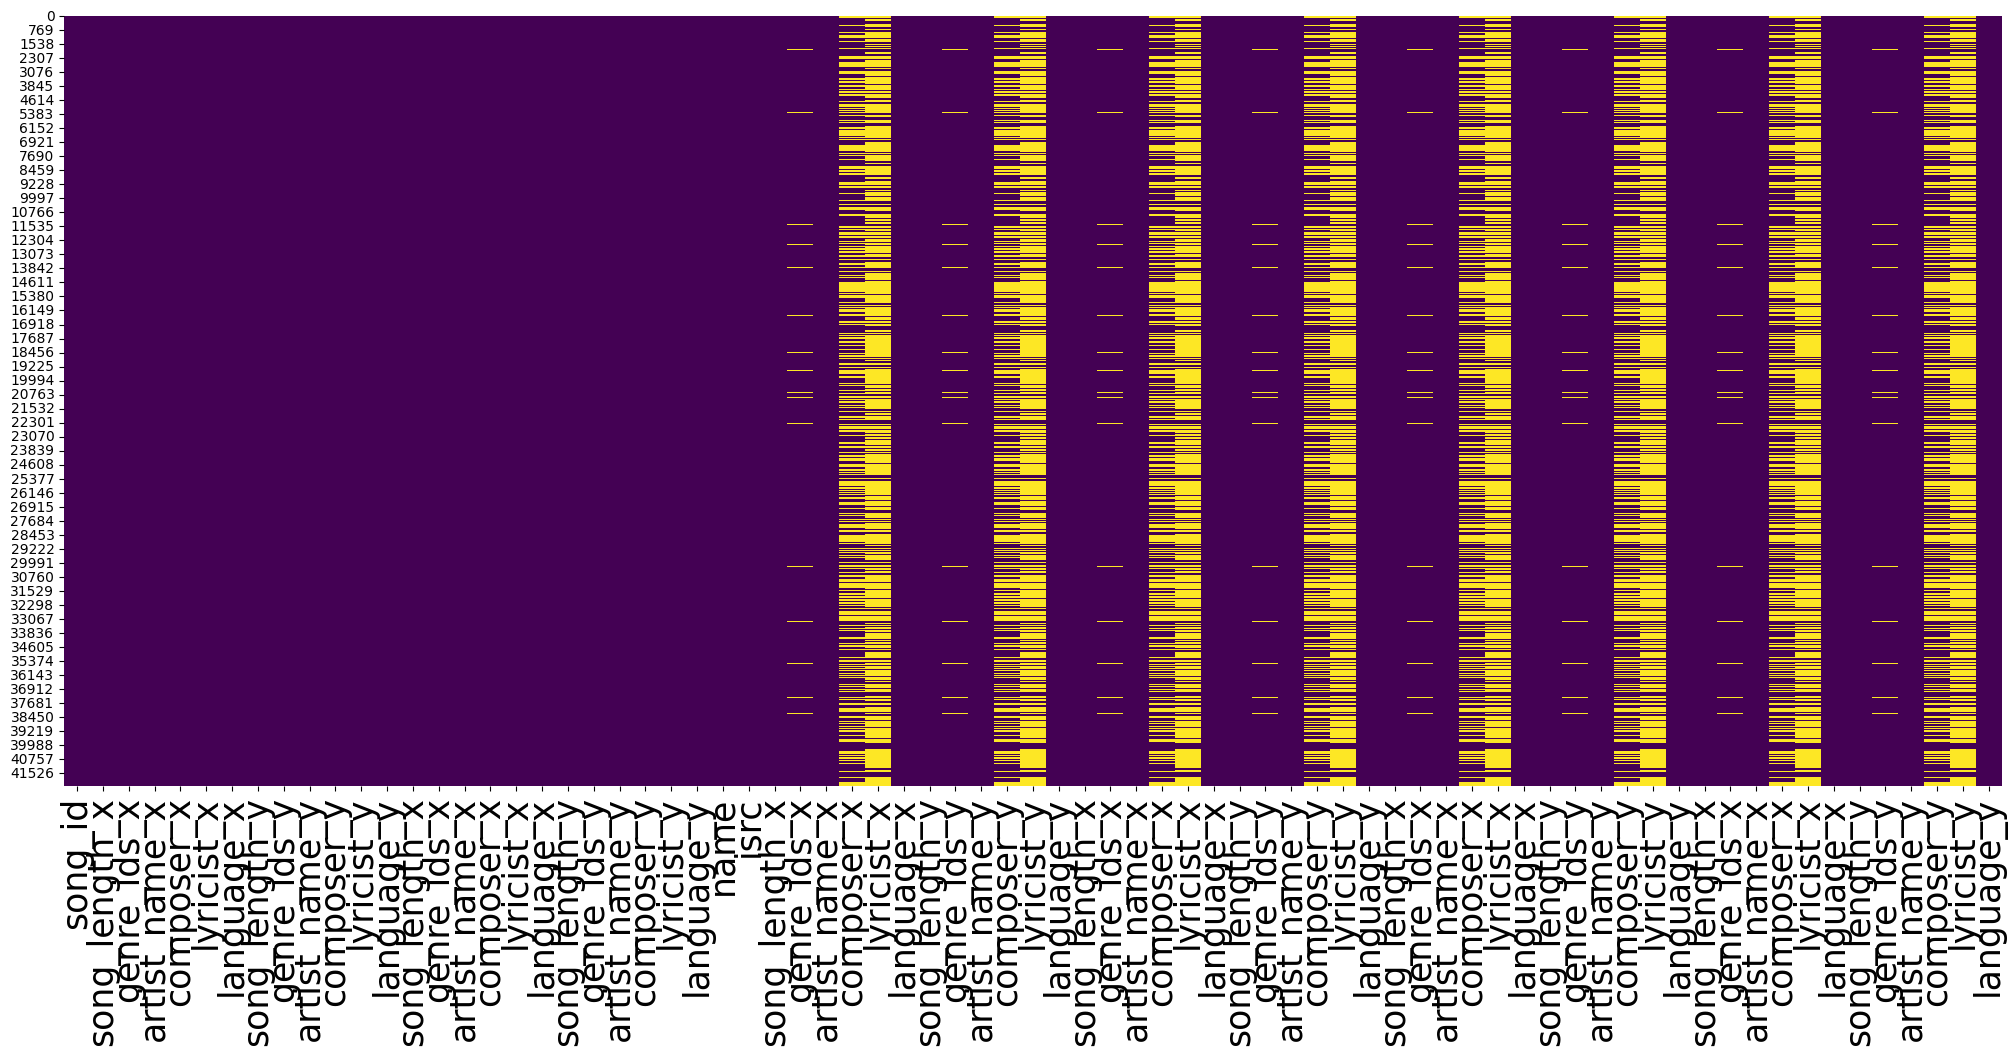

In [48]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.tick_params(axis='x', labelsize=25)

Filling Null Values

In [52]:
# Strings with 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
# Numerics with mean    
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

In [53]:
df.isna().sum()

song_id          0
song_length_x    0
genre_ids_x      0
artist_name_x    0
composer_x       0
                ..
genre_ids_y      0
artist_name_y    0
composer_y       0
lyricist_y       0
language_y       0
Length: 75, dtype: int64

In [55]:
df.head()

,song_id,song_length_x,genre_ids_x,artist_name_x,composer_x,lyricist_x,language_x,song_length_y,genre_ids_y,artist_name_y,...,artist_name_x,composer_x,lyricist_x,language_x,song_length_y,genre_ids_y,artist_name_y,composer_y,lyricist_y,language_y
0,NsntfGyotnyocQ64GFLPWlVSYly+nVZ8neQHUnJQp80=,219533.0,458,戴愛玲 (Ailing Tai),王琳筠,黃婷,3.0,219533.0,458,戴愛玲 (Ailing Tai),...,戴愛玲 (Ailing Tai),王琳筠,黃婷,3.0,219533.0,458,戴愛玲 (Ailing Tai),王琳筠,黃婷,3.0
1,owaj6E2Yc662G6a7+tmA4dCeEuZdHvOY8PaT0OOomz4=,1153880.0,unknown,小童話大世界,幼福文化,幼福文化,3.0,1153880.0,unknown,小童話大世界,...,小童話大世界,幼福文化,幼福文化,3.0,1153880.0,unknown,小童話大世界,幼福文化,幼福文化,3.0
2,sHidPmLkgZH2lWg8tiPf25NZ3xHB1/uYvD4AJIQAI6I=,257358.0,1609,Joe Hertz,unknown,unknown,52.0,257358.0,1609,Joe Hertz,...,Joe Hertz,unknown,unknown,52.0,257358.0,1609,Joe Hertz,unknown,unknown,52.0
3,OY3CKsJ5YlpDdITUKPB05Paq1Td9gznNE6EknqPKAa8=,289645.0,465,炎亞綸 (Aaron Yan),unknown,unknown,17.0,289645.0,465,炎亞綸 (Aaron Yan),...,炎亞綸 (Aaron Yan),unknown,unknown,17.0,289645.0,465,炎亞綸 (Aaron Yan),unknown,unknown,17.0
4,3ks+Pfj+IMgswPEAyxuVwP+9H6pCl4oXmfCFpcg+PXY=,255929.0,2022,LiSA,LiSA,LiSA,17.0,255929.0,2022,LiSA,...,LiSA,LiSA,LiSA,17.0,255929.0,2022,LiSA,LiSA,LiSA,17.0


Encoding and Categorizating Columns

In [56]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42248 entries, 0 to 42247
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   song_id        42248 non-null  int32  
 1   song_length_x  42248 non-null  float64
 2   genre_ids_x    42248 non-null  object 
 3   artist_name_x  42248 non-null  object 
 4   composer_x     42248 non-null  object 
 5   lyricist_x     42248 non-null  object 
 6   language_x     42248 non-null  float64
 7   song_length_y  42248 non-null  float64
 8   genre_ids_y    42248 non-null  object 
 9   artist_name_y  42248 non-null  object 
 10  composer_y     42248 non-null  object 
 11  lyricist_y     42248 non-null  object 
 12  language_y     42248 non-null  float64
 13  song_length_x  42248 non-null  float64
 14  genre_ids_x    42248 non-null  object 
 15  artist_name_x  42248 non-null  object 
 16  composer_x     42248 non-null  object 
 17  lyricist_x     42248 non-null  object 
 18  langua

In [58]:
df.describe()

,song_id,song_length_x,language_x,song_length_y,language_y,song_length_x,language_x,song_length_y,language_y,name,...,song_length_y,language_y,song_length_x,language_x,song_length_y,language_y,song_length_x,language_x,song_length_y,language_y
count,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000,42248.000000,...,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000,4.224800e+04,42248.000000
mean,21123.500000,2.461010e+05,26.146685,2.461010e+05,26.146685,2.461010e+05,26.147297,2.461010e+05,26.147297,12269.936778,...,2.461010e+05,26.147297,2.461010e+05,26.147297,2.461010e+05,26.147297,2.461010e+05,26.147297,2.461010e+05,26.147297
std,12196.091423,1.247853e+05,23.319651,1.247853e+05,23.319651,1.247853e+05,23.319991,1.247853e+05,23.319991,5140.733192,...,1.247853e+05,23.319991,1.247853e+05,23.319991,1.247853e+05,23.319991,1.247853e+05,23.319991,1.247853e+05,23.319991
min,0.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000,0.000000,...,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000,3.529000e+03,-1.000000
25%,10561.750000,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000,9359.000000,...,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000,1.994180e+05,3.000000
50%,21123.500000,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000,14006.000000,...,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000,2.340100e+05,24.000000
75%,31685.250000,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000,14006.000000,...,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000,2.730662e+05,52.000000
max,42247.000000,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000,22304.000000,...,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000,4.748341e+06,59.000000


<ipython-input-59-285a7a7f9d84>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


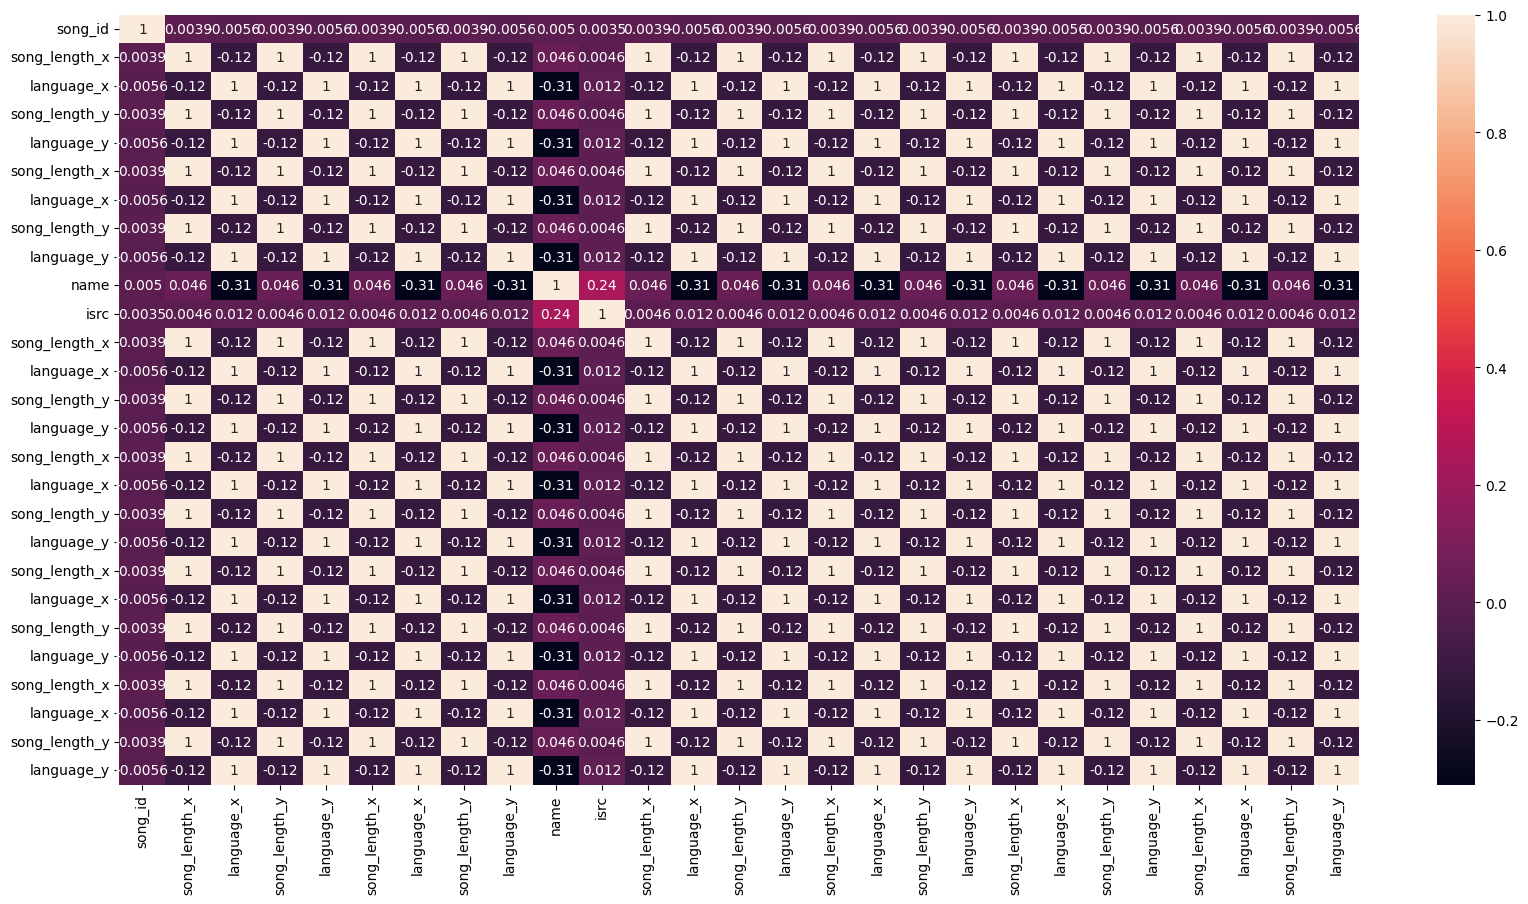

In [59]:
# Сorrelation matrix
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
%matplotlib inline

In [82]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [84]:
df.isnull().aggregate('sum')

msno                       0
song_id                    0
source_system_tab       9690
source_screen_name    133206
source_type             8088
target                     1
dtype: int64

<Axes: xlabel='source_system_tab', ylabel='count'>

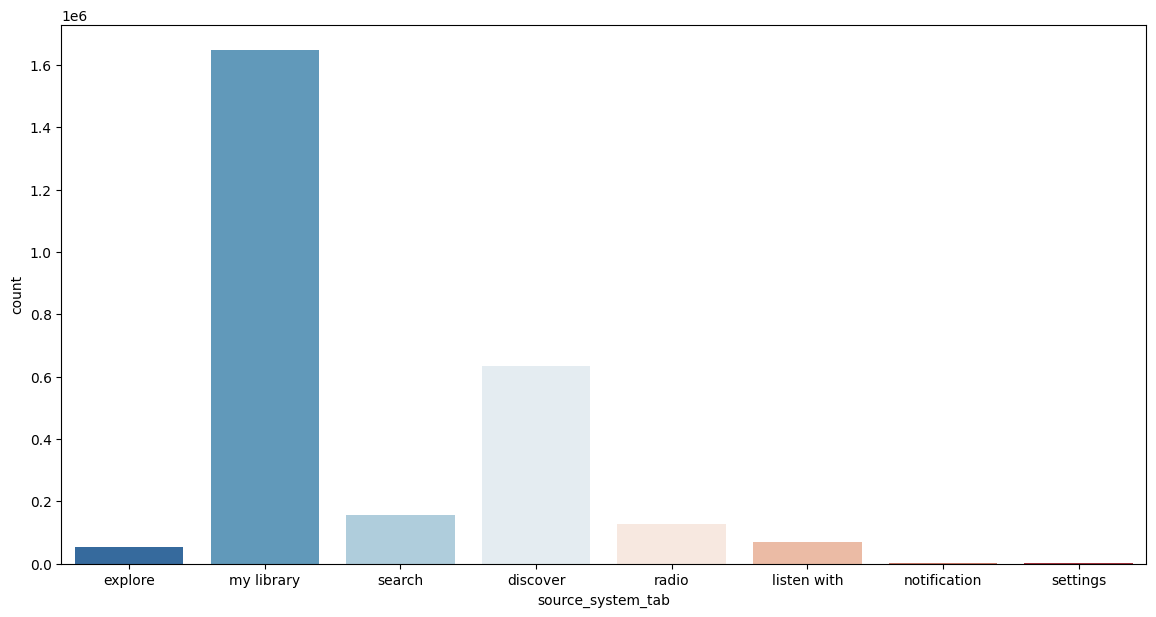

In [83]:
plt.figure(figsize=(14,7))
sns.countplot(x='source_system_tab', data=df, palette='RdBu_r')

<Axes: xlabel='source_screen_name', ylabel='count'>

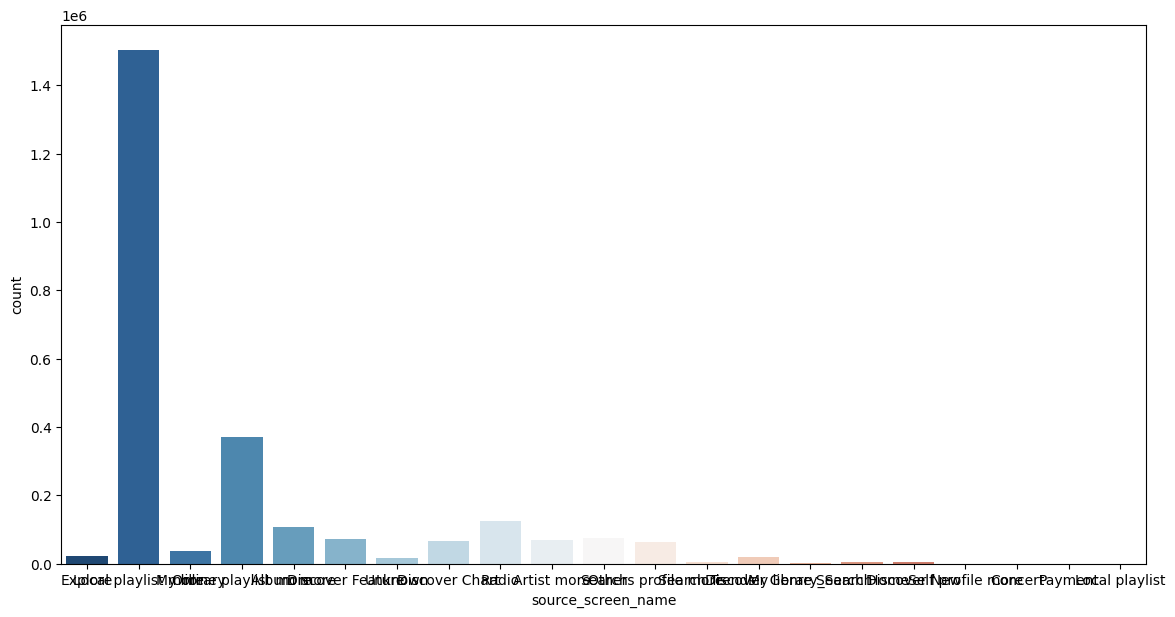

In [85]:
plt.figure(figsize=(14, 7))
sns.countplot(x='source_screen_name', data=df, palette='RdBu_r')

In [87]:
temp_df = df.groupby(['source_system_tab', 'source_screen_name'])['target'].aggregate(['count', 'sum']).reset_index()

In [89]:
temp_df['ratio'] = temp_df['sum']/temp_df['count']

In [90]:
temp_df_pivot = temp_df.pivot('source_system_tab', 'source_screen_name', 'ratio')

<ipython-input-90-bec3157bdcdb>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  temp_df_pivot = temp_df.pivot('source_system_tab', 'source_screen_name', 'ratio')


In [91]:
temp_df_pivot.head()

source_screen_name,Album more,Artist more,Concert,Discover Chart,Discover Feature,Discover Genre,Discover New,Explore,Local playlist,Local playlist more,...,My library_Search,Online playlist more,Others profile more,Payment,Radio,Search,Search Home,Search Trends,Self profile more,Unknown
source_system_tab,,,,,,,,,,,,,,,,,,,,,
discover,0.385658,0.409158,NaN,0.618673,0.408402,0.389016,0.452276,0.000000,NaN,0.538198,...,NaN,0.476086,0.198330,NaN,0.119089,0.469577,0.000000,0.346767,NaN,0.319649
explore,0.390548,0.237864,NaN,NaN,0.000000,NaN,NaN,0.514134,NaN,0.520979,...,NaN,0.463559,0.209677,NaN,0.050000,0.452571,0.200000,0.448980,NaN,0.210526
listen with,0.326772,0.625000,0.142857,0.846154,0.102041,NaN,NaN,0.666667,NaN,0.630990,...,NaN,0.519522,0.372011,NaN,0.826087,0.446809,NaN,0.166667,0.510638,0.095238
my library,0.457955,0.484702,1.000000,0.590062,0.517007,0.240741,NaN,0.659091,NaN,0.743587,...,0.668731,0.441094,0.401842,1.0,0.226190,0.525109,0.368421,0.452641,0.821429,0.487179
notification,0.455108,0.285714,NaN,0.307692,0.666667,NaN,0.000000,NaN,NaN,0.548673,...,NaN,0.262799,0.456140,NaN,NaN,0.800000,NaN,0.375000,NaN,0.450000


<Axes: xlabel='source_screen_name', ylabel='source_system_tab'>

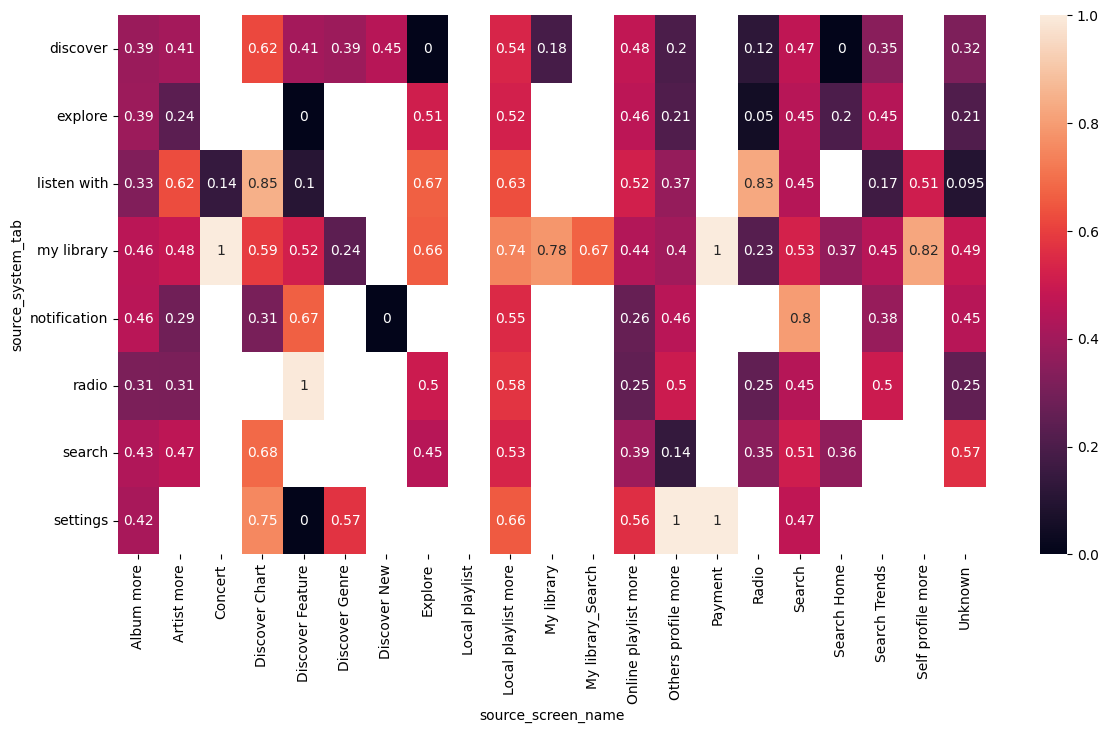

In [92]:
plt.figure(figsize=(14, 7))
sns.heatmap(temp_df_pivot, annot=True)

<ipython-input-93-9d32008d01ac>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  temp_df_pivot = temp_df.pivot('source_system_tab', 'source_screen_name', 'count')


<Axes: xlabel='source_screen_name', ylabel='source_system_tab'>

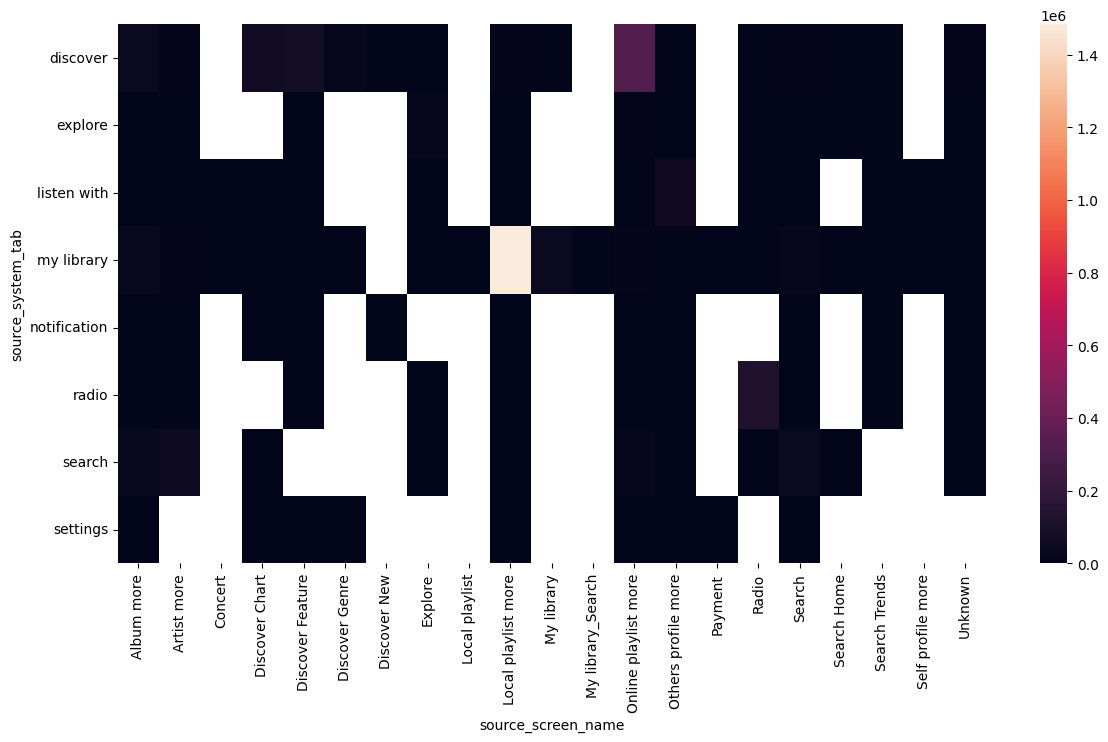

In [93]:
temp_df_pivot = temp_df.pivot('source_system_tab', 'source_screen_name', 'count')
plt.figure(figsize=(14,7))
sns.heatmap(temp_df_pivot)

<Axes: >

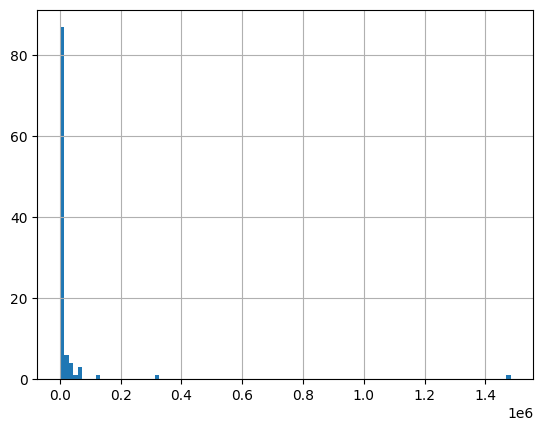

In [94]:
temp_df['count'].hist(bins=100)